# Finding Modes (Simple Approach)
In this example, we search for the modes of a split ring resonator, and visualise the corresponding current and charge distribution. These modes exist at complex frequencies (ie. values of $s$ with nonzero real parts), and are found using iterative search techniques

In [1]:
# the numpy library contains useful mathematical functions
import numpy as np

# function to display images from disk
from IPython.display import Image, display

# import useful python libraries
import os.path as osp
import os

# import the openmodes packages
import openmodes

# setup 2D and 3D plotting 
%matplotlib notebook
from openmodes.ipython import init_3d, matplotlib_defaults
init_3d()
matplotlib_defaults()
import matplotlib.pyplot as plt


First we load the geometry of a split ring from a file, then, we place 4 copies of this ring in an array, purely for visualisation purposes. Note how the geometric parameter `inner_radius` has been overriden to make the ring is slightly wider than in the previous example, for nicer plots.

In [2]:
sim = openmodes.Simulation(name='example2')
ring = sim.load_mesh(osp.join(openmodes.geometry_dir, "SRR.geo"), parameters={'inner_radius': 2.5e-3}, mesh_tol=0.5e-3)
rings = []
rings.append(sim.place_part(ring, location=[0e-3, 0, 0]))
rings.append(sim.place_part(ring, location=[10e-3, 0, 0]))
rings.append(sim.place_part(ring, location=[20e-3, 0, 0]))
rings.append(sim.place_part(ring, location=[30e-3, 0, 0]));

Now we ask OpenModes to find the values of the complex frequency parameter `s` for which the system becomes singular. This is how we find the modes of the system, using an iterative search. Note that we need to specify a frequency at which to perform some intial estimations. The choice of this frequency is not too critical, but it should be somewhere in the range. Here we will calculate the 4 lowest order modes.

In [3]:
start_freq = 2e9
start_s = 2j*np.pi*start_freq

num_modes = 4
mode_s, mode_j = sim.singularities(start_s, num_modes, rings[0]);

Note that since all 4 parts are identical, it is only necessary to calculate the singularities for one of them. Let us now consider only the eigenfrequencies of the first ring.

Let us now plot the location of the modes in the complex s plane. Physically, we know that they must occur in complex-conjugate pairs, however the search routine only returns one member of each pair. The frequency of each mode is represented by their position on the $j\omega$ axis, while the $\Omega$ axis gives the damping, which is related to the width of the resonance.

<IPython.core.display.Javascript object>


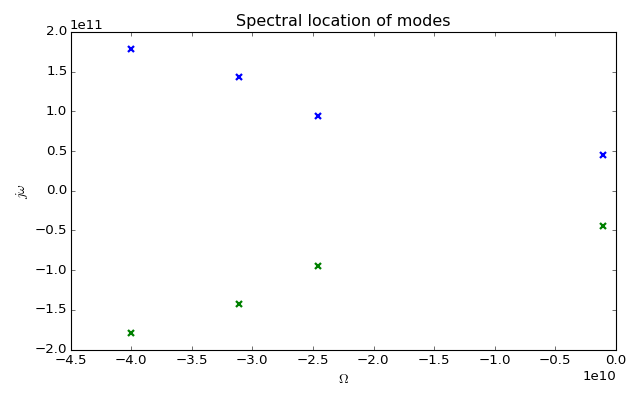

In [4]:
plt.figure();
plt.plot(mode_s.real, mode_s.imag, 'x')
plt.plot(mode_s.real, -mode_s.imag, 'x')
plt.ylabel('$j\omega$')
plt.xlabel('$\Omega$')
plt.title('Spectral location of modes')
plt.tight_layout()
plt.show()

We can find the computed values of the resonant frequencies in Hz by looking at the imaginary parts of the singular points. For this particular geometry, we see that these split rings resonate in the GHz frequency range. Note that the lowest order modes will be most accurately represented, whereas for higher order modes the mesh cells are larger relative to the wavelength. If in doubt, repeat the calculation for smaller mesh tolerance and see how much the values change.

In [5]:
mode_s.imag/2/np.pi

array([  7.07140022e+09,   1.50685533e+10,   2.27611035e+10,
         2.85072420e+10])

As well as calculating the frequencies of the modes, we can also plot the corresponding surface currents and charges. We will set the solution on each ring to be one of the modes so that we can see them all. We just need to rearrange the data from an array of column vectors into a list of currents for each part.

In [6]:
currents = sim.empty_vector()
for n in range(num_modes):
    currents[rings[n]] = mode_j["J", :, n]

The easiest way to view this calculated solution is with the the 3D interactive web-based plots that openmodes produces. Because charges are strongly divergent near edges, it can be very difficult to see the modes clearly, so the parameter `compress_scalars` has been used to smooth out the extreme values. Also the parameter `compress_separately` means that each part will be normalised to have a similar current magnitude, which makes the plot easier to view.

Use the mouse to navigate the plot. The left button rotates the view, the right button pans, and the scroll wheel zooms in and out. If you have problems viewing the output, please make sure that your web browser and graphics drivers are up to date.

In [7]:
sim.plot_3d(solution=currents*1e-4, output_format='webgl',
            compress_scalars=5, compress_separately=True)

The colour plot shows the charge distribution, with reds representing positive charge, and blues representing negative. We see that the higher order modes have more strongly varying charge distributions, as we would expect. The black arrays show the corresponding flow of surface current, which changes direction more often for higher order modes.

By default these plots show only the _real_ parts of the solution. The imaginary parts of charge and current always exist, and can be seen by changing the format drop-box.